In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #general plot
import seaborn as sns            #for data analytics like for boxplot, histogram,etc..
from scipy import stats

import statsmodels.formula.api as smf

from joblib import dump,load

import warnings
warnings.filterwarnings('ignore')

In [6]:
cars_data=pd.read_csv('Cars.csv')
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [7]:
cars_data.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

In [10]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [8]:
cars_data.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

# Without Data Transformation

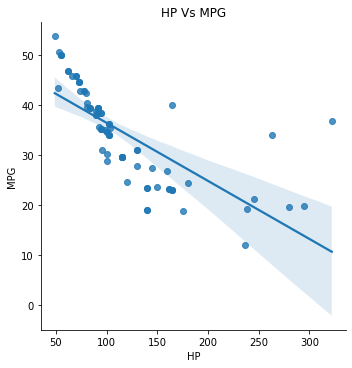

In [12]:
sns.lmplot(x='HP',y='MPG',data=cars_data)
plt.title('HP Vs MPG')
plt.show()

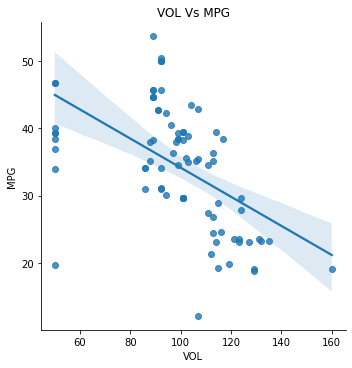

In [14]:
sns.lmplot(x='VOL',y='MPG',data=cars_data)
plt.title('VOL Vs MPG')
plt.show()

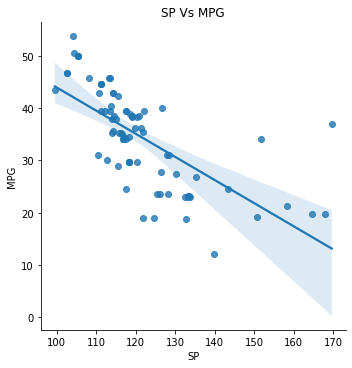

In [15]:
sns.lmplot(x='SP',y='MPG',data=cars_data)
plt.title('SP Vs MPG')
plt.show()

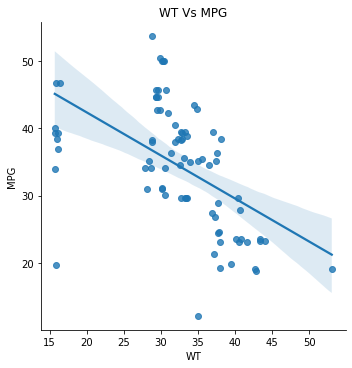

In [16]:
sns.lmplot(x='WT',y='MPG',data=cars_data)
plt.title('WT Vs MPG')
plt.show()

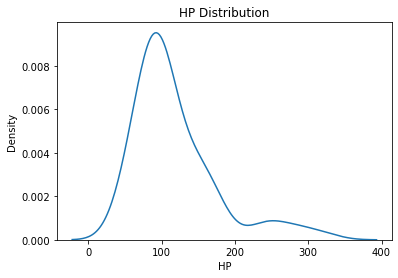

In [27]:
sns.distplot(cars_data['HP'],hist=False)
plt.title('HP Distribution')
plt.show()

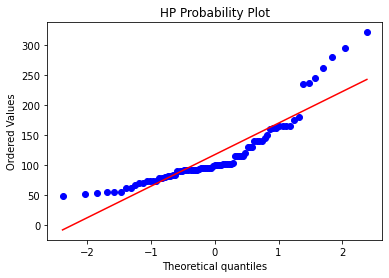

In [24]:
stats.probplot(cars_data['HP'],plot=plt)
plt.title('HP Probability Plot')
plt.show()

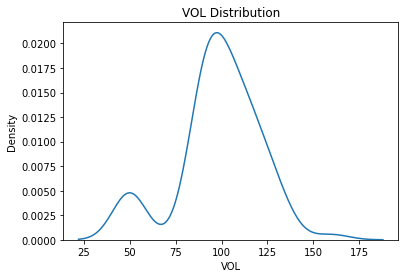

In [28]:
sns.distplot(cars_data['VOL'],hist=False)
plt.title('VOL Distribution')
plt.show()

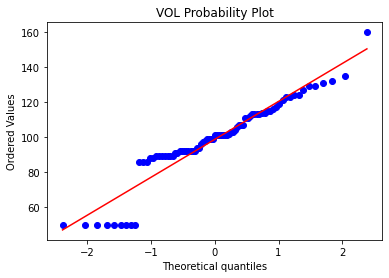

In [29]:
stats.probplot(cars_data['VOL'],plot=plt)
plt.title('VOL Probability Plot')
plt.show()

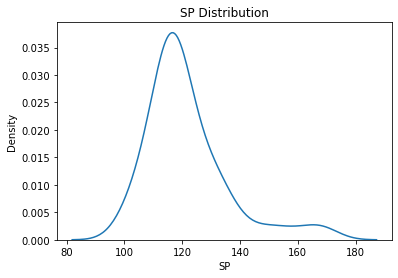

In [30]:
sns.distplot(cars_data['SP'],hist=False)
plt.title('SP Distribution')
plt.show()

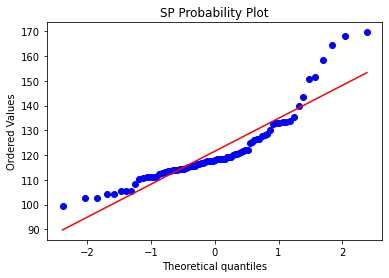

In [31]:
stats.probplot(cars_data['SP'],plot=plt)
plt.title('SP Probability Plot')
plt.show()

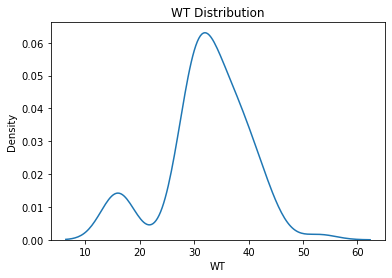

In [32]:
sns.distplot(cars_data['WT'],hist=False)
plt.title('WT Distribution')
plt.show()

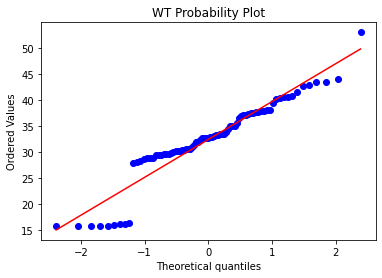

In [33]:
stats.probplot(cars_data['WT'],plot=plt)
plt.title('WT Probability Plot')
plt.show()

In [64]:
cars_data.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


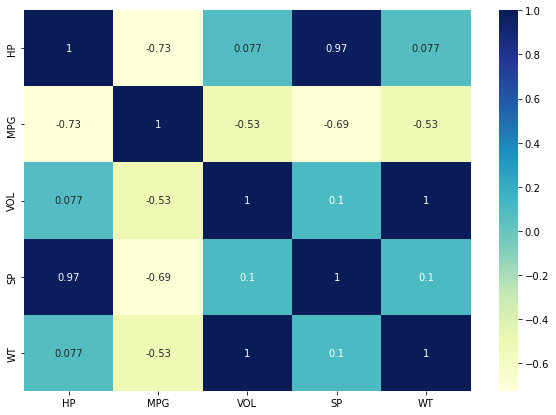

In [71]:
plt.figure(figsize=(10,7))
sns.heatmap(cars_data.corr(),annot=True,cmap="YlGnBu")
plt.show()

## VIF

In [78]:
rsqr_hp = smf.ols('HP~VOL+WT+SP', data=cars_data).fit().rsquared
vif_hp = 1/(1-rsqr_hp)

rsqr_vol = smf.ols('VOL~HP+WT+SP', data=cars_data).fit().rsquared
vif_vol = 1/(1-rsqr_vol)

rsqr_sp = smf.ols('SP~HP+WT+VOL', data=cars_data).fit().rsquared
vif_sp = 1/(1-rsqr_sp)

rsqr_wt = smf.ols('WT~HP+VOL+SP', data=cars_data).fit().rsquared
vif_wt = 1/(1-rsqr_wt)

In [79]:
vif_val=pd.DataFrame({'Features':['HP','VOL','SP','WT'],'VIF':[vif_hp,vif_vol,vif_sp,vif_wt]})
vif_val

,Features,VIF
0,HP,19.926589
1,VOL,638.806084
2,SP,20.007639
3,WT,639.533818


# Model Building

In [86]:
model_1=smf.ols('MPG~HP',data=cars_data).fit()

print(f'R_Square     :{model_1.rsquared}')
print(f'Adj R_Square :{model_1.rsquared_adj}')
print(f'AIC          :{model_1.aic}')
print(f'BIC          :{model_1.bic}')
print(f'P-values     :\n{model_1.pvalues}')

R_Square     :0.5256806086282022
Adj R_Square :0.5196765656994453
AIC          :530.7452702659343
BIC          :535.5341685752792
P-values     :
Intercept    1.211037e-44
HP           1.956490e-14
dtype: float64


In [89]:
model_2=smf.ols('MPG~HP+VOL',data=cars_data).fit()

print(f'R_Square     :{model_2.rsquared}')
print(f'Adj R_Square :{model_2.rsquared_adj}')
print(f'AIC          :{model_2.aic}')
print(f'BIC          :{model_2.bic}')
print(f'P-values     :\n{model_2.pvalues}')

R_Square     :0.7506606277376424
Adj R_Square :0.744267310500146
AIC          :480.65692370523766
BIC          :487.84027116925495
P-values     :
Intercept    7.697003e-41
HP           1.203680e-19
VOL          1.654693e-12
dtype: float64


In [92]:
model_3=smf.ols('MPG~HP+VOL+SP',data=cars_data).fit()

print(f'R_Square     :{model_3.rsquared}')
print(f'Adj R_Square :{model_3.rsquared_adj}')
print(f'AIC          :{model_3.aic}')
print(f'BIC          :{model_3.bic}')
print(f'P-values     :\n{model_3.pvalues}')

R_Square     :0.7703683413213019
Adj R_Square :0.7614216533208332
AIC          :475.98751588546094
BIC          :485.5653125041507
P-values     :
Intercept    4.194554e-02
HP           8.644870e-07
VOL          1.648229e-13
SP           1.207855e-02
dtype: float64


In [93]:
model_4=smf.ols('MPG~HP+VOL+SP+WT',data=cars_data).fit()

print(f'R_Square     :{model_4.rsquared}')
print(f'Adj R_Square :{model_4.rsquared_adj}')
print(f'AIC          :{model_4.aic}')
print(f'BIC          :{model_4.bic}')
print(f'P-values     :\n{model_4.pvalues}')

R_Square     :0.7705372737359844
Adj R_Square :0.7584602881431415
AIC          :477.92790493548785
BIC          :489.90015070885005
P-values     :
Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64


# Data Transformation

In [95]:
cars_data_2=cars_data.copy()

In [96]:
cars_data_2['HP_log']=np.log(cars_data_2['HP'])
cars_data_2['VOL_log']=np.log(cars_data_2['VOL'])
cars_data_2['SP_log']=np.log(cars_data_2['SP'])
cars_data_2['WT_log']=np.log(cars_data_2['WT'])
cars_data_2

,HP,MPG,VOL,SP,WT,HP_log,VOL_log,SP_log,WT_log
0,49,53.700681,89,104.185353,28.762059,3.891820,4.488636,4.646172,3.359057
1,55,50.013401,92,105.461264,30.466833,4.007333,4.521789,4.658344,3.416639
2,55,50.013401,92,105.461264,30.193597,4.007333,4.521789,4.658344,3.407630
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049
4,53,50.504232,92,104.461264,29.889149,3.970292,4.521789,4.648816,3.397495
...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,3.912023,5.133434,2.780864
77,238,19.197888,115,150.576579,37.923113,5.472271,4.744932,5.014472,3.635561
78,263,34.000000,50,151.598513,15.769625,5.572154,3.912023,5.021236,2.758086
79,295,19.833733,119,167.944460,39.423099,5.686975,4.779123,5.123633,3.674352


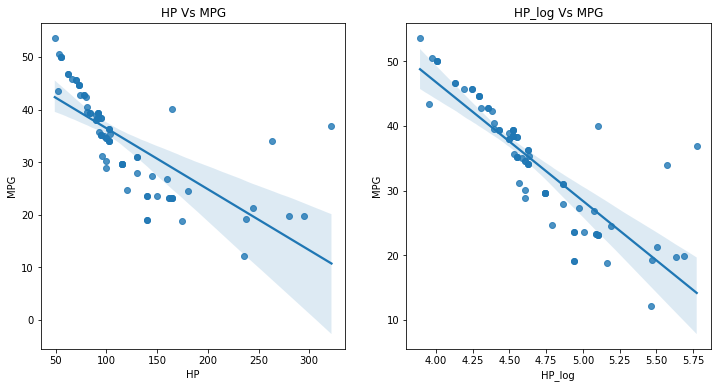

In [112]:
fig,axis=plt.subplots(1,2,figsize=(12,6))
sns.regplot(x='HP',y='MPG',data=cars_data,ax=axis[0])
axis[0].set_title('HP Vs MPG')

sns.regplot(x='HP_log',y='MPG',data=cars_data_2,ax=axis[1])
axis[1].set_title('HP_log Vs MPG')

plt.show()

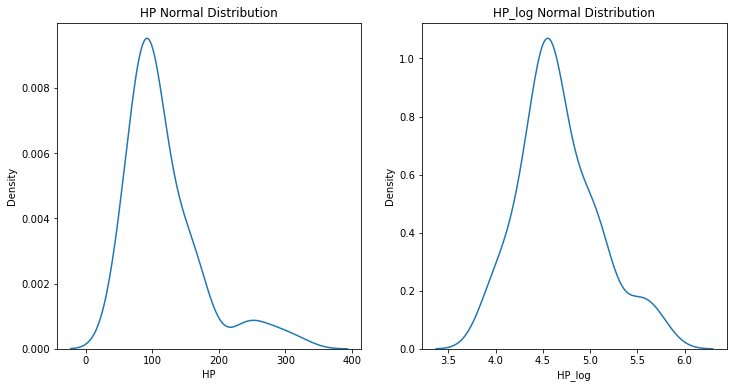

In [120]:
fig,axis=plt.subplots(1,2,figsize=(12,6))

sns.kdeplot(cars_data['HP'],ax=axis[0])
axis[0].set_title('HP Normal Distribution')

sns.kdeplot(cars_data_2['HP_log'],ax=axis[1])
axis[1].set_title('HP_log Normal Distribution')

plt.show()

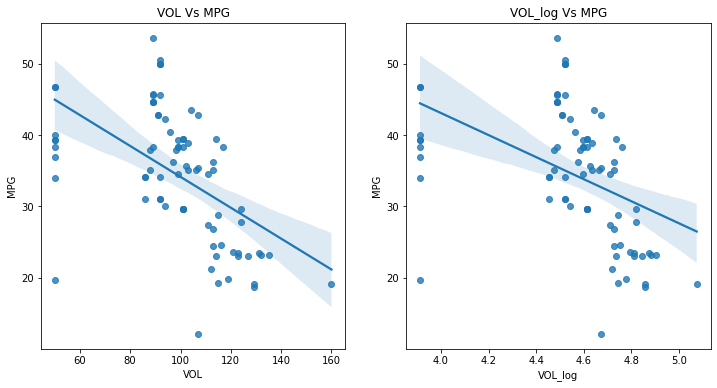

In [114]:
fig,axis=plt.subplots(1,2,figsize=(12,6))
sns.regplot(x='VOL',y='MPG',data=cars_data,ax=axis[0])
axis[0].set_title('VOL Vs MPG')

sns.regplot(x='VOL_log',y='MPG',data=cars_data_2,ax=axis[1])
axis[1].set_title('VOL_log Vs MPG')

plt.show()

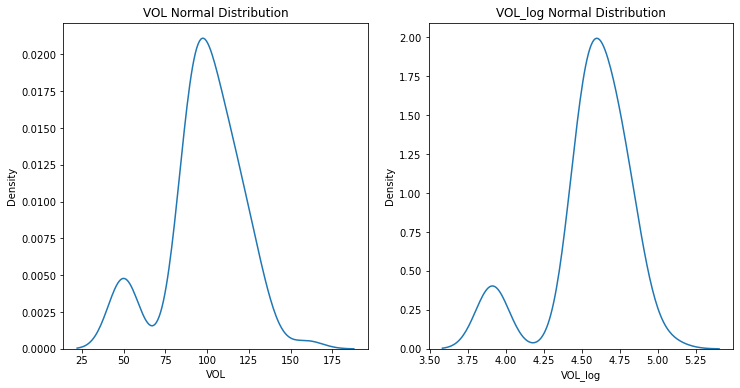

In [121]:
fig,axis=plt.subplots(1,2,figsize=(12,6))

sns.kdeplot(cars_data['VOL'],ax=axis[0])
axis[0].set_title('VOL Normal Distribution')

sns.kdeplot(cars_data_2['VOL_log'],ax=axis[1])
axis[1].set_title('VOL_log Normal Distribution')

plt.show()

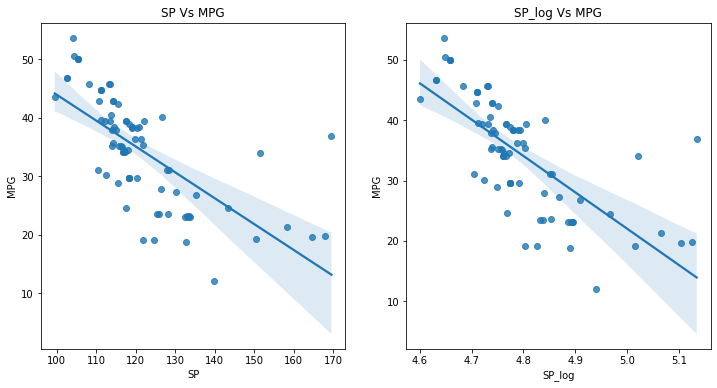

In [115]:
fig,axis=plt.subplots(1,2,figsize=(12,6))
sns.regplot(x='SP',y='MPG',data=cars_data,ax=axis[0])
axis[0].set_title('SP Vs MPG')

sns.regplot(x='SP_log',y='MPG',data=cars_data_2,ax=axis[1])
axis[1].set_title('SP_log Vs MPG')

plt.show()

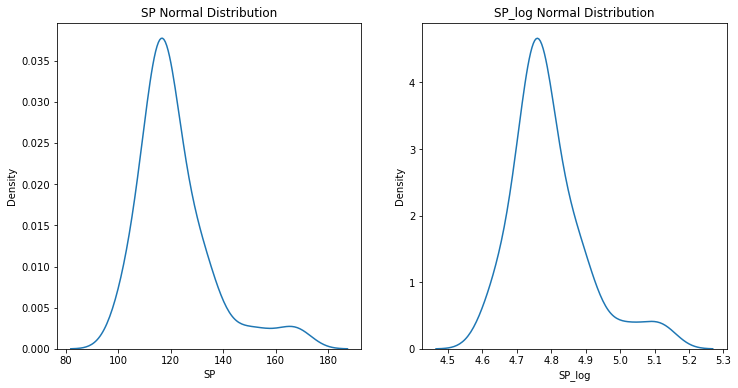

In [122]:
fig,axis=plt.subplots(1,2,figsize=(12,6))

sns.kdeplot(cars_data['SP'],ax=axis[0])
axis[0].set_title('SP Normal Distribution')

sns.kdeplot(cars_data_2['SP_log'],ax=axis[1])
axis[1].set_title('SP_log Normal Distribution')

plt.show()

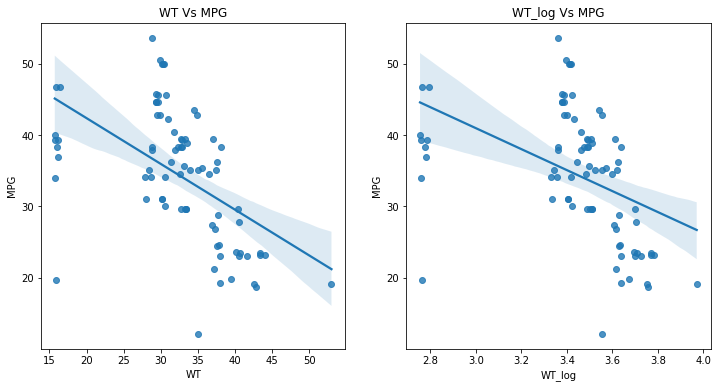

In [116]:
fig,axis=plt.subplots(1,2,figsize=(12,6))
sns.regplot(x='WT',y='MPG',data=cars_data,ax=axis[0])
axis[0].set_title('WT Vs MPG')

sns.regplot(x='WT_log',y='MPG',data=cars_data_2,ax=axis[1])
axis[1].set_title('WT_log Vs MPG')

plt.show()

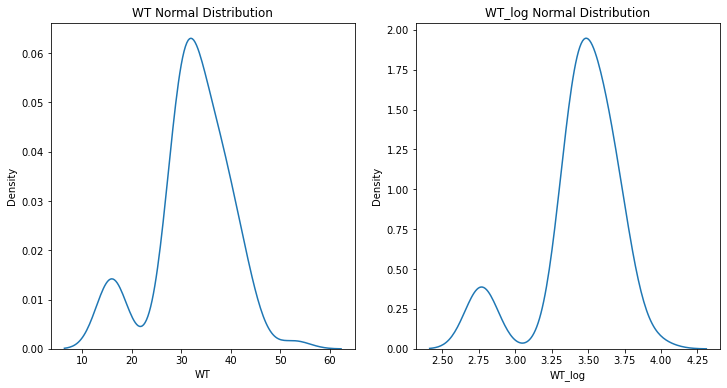

In [123]:
fig,axis=plt.subplots(1,2,figsize=(12,6))

sns.kdeplot(cars_data['WT'],ax=axis[0])
axis[0].set_title('WT Normal Distribution')

sns.kdeplot(cars_data_2['WT_log'],ax=axis[1])
axis[1].set_title('WT_log Normal Distribution')

plt.show()

In [124]:
model_1_log=smf.ols('MPG~HP_log+VOL_log+SP_log+WT_log',data=cars_data_2).fit()

print(f'R_Square     :{model_1_log.rsquared}')
print(f'Adj R_Square :{model_1_log.rsquared_adj}')
print(f'AIC          :{model_1_log.aic}')
print(f'BIC          :{model_1_log.bic}')
print(f'P-values     :\n{model_1_log.pvalues}')

R_Square     :0.9117779418023274
Adj R_Square :0.9071346755813973
AIC          :400.5013350503873
BIC          :412.4735808237495
P-values     :
Intercept    1.461211e-02
HP_log       1.563309e-22
VOL_log      6.825708e-01
SP_log       3.314965e-11
WT_log       4.537425e-01
dtype: float64


In [125]:
model_2_log=smf.ols('MPG~HP_log+VOL_log+SP_log',data=cars_data_2).fit()

print(f'R_Square     :{model_2_log.rsquared}')
print(f'Adj R_Square :{model_2_log.rsquared_adj}')
print(f'AIC          :{model_2_log.aic}')
print(f'BIC          :{model_2_log.bic}')
print(f'P-values     :\n{model_2_log.pvalues}')

R_Square     :0.911119649749892
Adj R_Square :0.9076567789609268
AIC          :399.10349401913345
BIC          :408.6812906378232
P-values     :
Intercept    2.979573e-03
HP_log       4.084975e-23
VOL_log      1.603615e-14
SP_log       2.763985e-11
dtype: float64


In [133]:
rsqr_df=pd.DataFrame({'Model':model_3.rsquared_adj.round(2),'Data Transformed Model':model_2_log.rsquared_adj.round(2)},index=['rsqr_adj'])
rsqr_df

,Model,Data Transformed Model
rsqr_adj,0.76,0.91


## The Adjacent R Square value increased from 0.76 to 0.91 after Log transformation

# Model Deployment

In [135]:
dump(model_2_log,'MPG_intelligence_optimized')

['MPG_intelligence_optimized']